## Read csv Data from 5047 Repositories

In [3]:
import pandas as pd
import math


df = pd.read_csv('filter_repositories.csv')
total_repositories = df['repository_id'].nunique()
print("total repositories : ", total_repositories)

total repositories :  5047


## calcaulate population size

In [15]:

def sample_size_calculator(population_size, confidence_level=0.95, margin_of_error=0.05, population_proportion=0.50):
    # Calculate the z-score for the given confidence level
    if confidence_level == 0.90:
        z = 1.645
    elif confidence_level == 0.95:
        z = 1.96
    elif confidence_level == 0.99:
        z = 2.576
    else:
        raise ValueError("Supported confidence levels are 0.90, 0.95, and 0.99.")

    # Apply the formula to calculate the sample size
    numerator = population_size * (z**2) * population_proportion * (1 - population_proportion)
    denominator = (population_size - 1) * (margin_of_error**2) + (z**2) * population_proportion * (1 - population_proportion)
    
    return math.ceil(numerator/denominator)  # We use math.ceil to ensure that we always round up to the nearest whole number.

# Test the function
population_size = total_repositories
smaple_size = sample_size_calculator(population_size)
print("sample size is :", smaple_size)


sample size is : 358


## Generate Sample to sample_data.csv file

In [22]:
sample = df.sample(n=smaple_size)
df.to_csv('sample_data.csv', index=False)
sample

,repository_id,repo_name,description,readme_content,starforks,commits,contributors,watchers,forks,stargazers,pull_requests,branches,tags,releases
3928,176641,edward0im/lockdpwn,massive code archives for study & research pur...,# code archive created by edward0im\n- massive...,3.750000,1494,2,1,3,5,0,1,0,0
2312,78587,atalukdar/MLHandsOnSession2Code,This repository contains code from the 2nd ML ...,# MLHandsOnSession2Code\nThis repository conta...,1.333333,2,1,1,1,2,0,1,0,0
2257,75976,wustMeiming/TensorflowPractice,斗大的熊猫大神博客WTF Daily Blog里面的tensorflow练习,# TensorflowPractice\n斗大的熊猫大神博客WTF Daily Blog里...,13.655172,9,1,1,11,18,0,1,0,0
3539,146700,leopd/vacation-photos-cnn,Analyze your vacation photos with deep learnin...,# vacation-photos-cnn\nAnalyze your vacation p...,5.538462,3,1,2,4,9,0,1,0,0
3264,127862,scotthuang1989/Python-3-Module-of-the-Week,study python lib every week,# Python-3-Module-of-the-Week\nstudy python li...,2.400000,53,1,1,2,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,54788,paraggupta1993/Reinforcement_Learning,"Experimenting with Q-Learning, Deep Q-Learning...",# Reinforcement_Learning\n\nTensorflow impleme...,1.333333,32,3,2,2,1,0,1,0,0
1366,35018,KT12/Udacity,Machine Learning Engineer Nanodegree,# Udacity\n\nA repository holding code and not...,5.090909,137,1,1,7,4,2,2,0,0
678,10476,SaulMontoya/managing_data_with_unfriendly_format,"Sometime you miss data, other times you have f...",# How to manage data on a unfriendly format\nS...,1.000000,2,1,1,1,1,0,1,0,0
3976,181500,lArkl/PedestrainDetection,Pedestrian Detection using Caltech and INRIA d...,# PedestrainDetection\nPedestrian Detection us...,13.500000,10,1,2,9,27,0,1,0,0


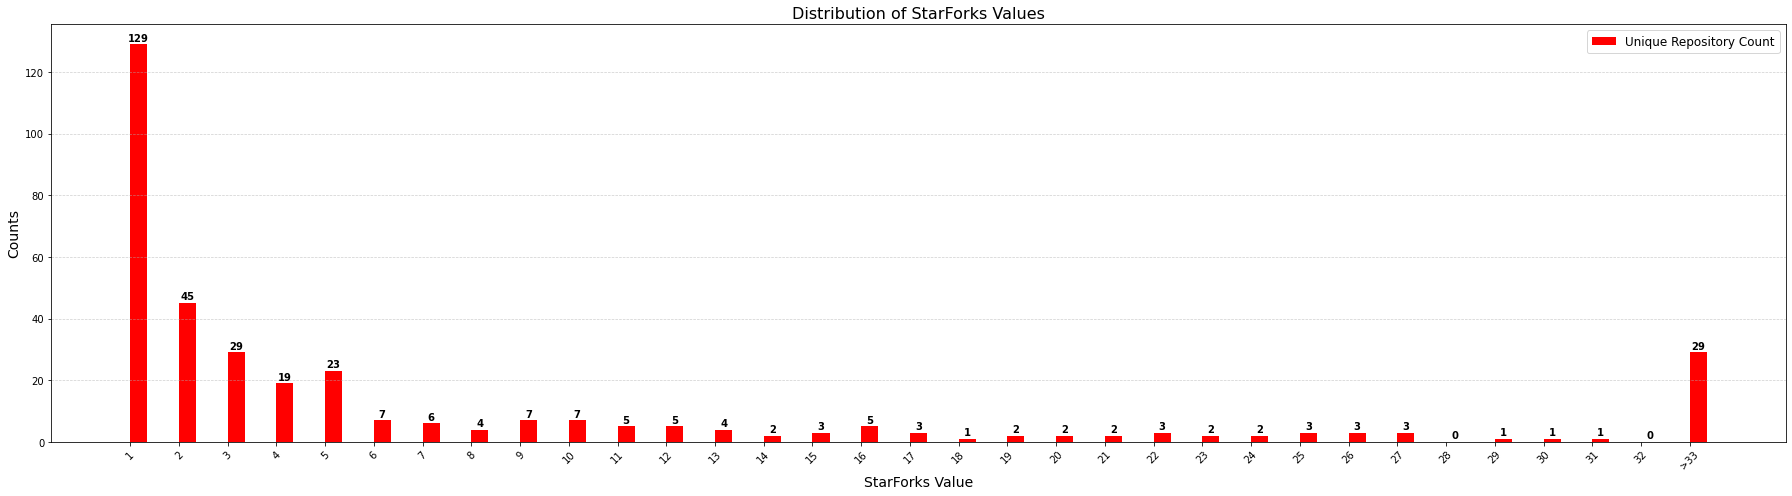

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Create bins from min value to 33 and then for values > 33
min_starfork = int(sample['starforks'].min())
bins = list(range(min_starfork, 34))  # This creates bins up to 33
bins.append(float('inf'))  # Add a bin for values > 33

# Create labels for the bins
labels = [str(i) for i in range(min_starfork, 33)]
labels.append('>33')

# Create the categories
sample['starforks_range'] = pd.cut(sample['starforks'], bins=bins, labels=labels, right=False)



# Calculate the unique count of repository_id for each category
repository_id_unique = sample.groupby('starforks_range')['repository_id'].nunique()

# Creating the bar positions
bar_width = 0.35
index = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(25, 7))  # Adjusting figure size

# Plotting the bars
bar2 = ax.bar(index + bar_width, repository_id_unique, bar_width, label='Unique Repository Count', color='red')


    
for i, v in enumerate(repository_id_unique):
    ax.text(i + bar_width, v + 0.5, str(v), ha='center', va='bottom', color='black', fontweight='bold')

# Decorating the plot
ax.set_xlabel('StarForks Value', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.set_title('Distribution of StarForks Values', fontsize=16)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels, rotation=45)  # Rotating x-axis labels
ax.legend(loc="upper right", fontsize=12)
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.6)

plt.tight_layout()
plt.show()
